In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lab_funcs as lf
import math
from scipy.optimize import fsolve

# Элементарные свойства. Редукция аргумента
## Задание
  Выполните редукцию аргумента логарифма так, чтобы всегда получать значения из интервала $[1,1+\epsilon)$, где $\epsilon$ - маленькое положительное число. Каким свойством предпочтительнее воспользоваться $\ln x^2=2\ln x$ или $\ln \frac{x}{2}=\ln x-\ln 2$? 

 ## Решение
 

1) Сначала воспользуемся свойством $\ln{x^2} = 2\ln{x}$.
Чтобы получить аргумент в интервале [1, 1 + $\epsilon$) воспользуемся тем, что $\sqrt[n]{x} \rightarrow 1$ при $n \rightarrow \infty$

2) Тогда $\ln{x^{\frac{1}{2n}}} = \frac{1}{2n} \ln{x} \Rightarrow \ln{x} = 2n \ln{x^{\frac{1}{2n}}}$ 
и при правильно выбранном $n$ аргумент
будет пробегать значения от 1 до 1 + $\epsilon$

3) Теперь рассмотрим эту задачу, используя свойство $\ln{\frac{x}{2}} = \ln{x} - \ln{2}$

\begin{equation}
  \ln{x} = \ln{\frac{x}{2^n}} + n\ln{2}
\end{equation}

4) Число обусловленности для первого и второго случая равно $\frac{1}{|y|}$

Промоделируем первый способ редукции

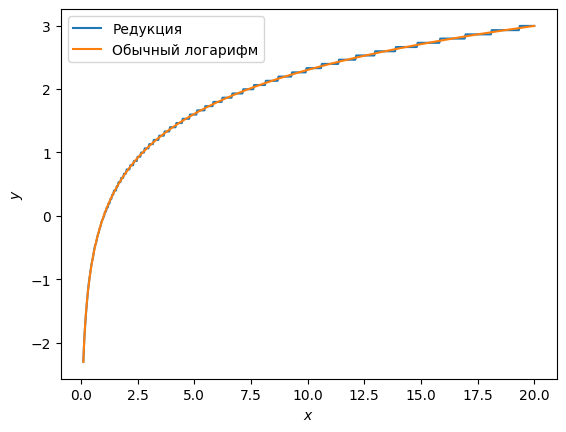

In [18]:
N = 500
x = np.linspace(0.1, 20, N)
eps=10e-15

# n for span [1 , 1 + delta]
n = math.ceil((np.log(max(x))/np.log(1+eps))/2) 

#y = np.log(np.divide(x, 2^n)) + n*np.log(2)
y = (2*n)*np.log(x**(1/(2*n)))
y1 = np.log(x)

plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Редукция", "Обычный логарифм"])
plt.show()

Второй способ:

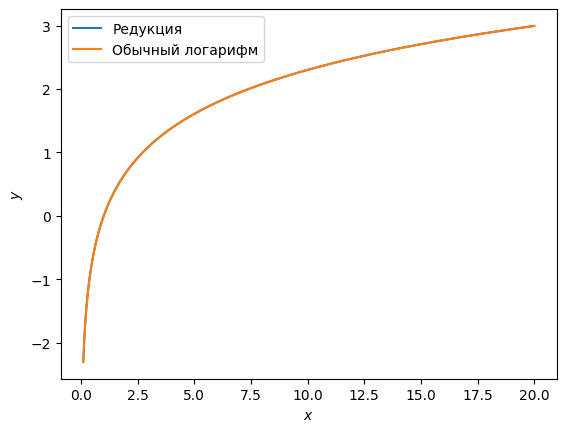

In [19]:
N = 500
x = np.linspace(0.1, 20, N)
eps=10e-15

# n for span [1 , 1 + delta]
n = math.ceil(np.log(max(x)/(1+eps))/np.log(2)) 

y = np.log(np.divide(x, 2**n)) + n*np.log(2)
y1 = np.log(x)

plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Редукция", "Обычный логарифм"])
plt.show()

Оценим погрешности редукций

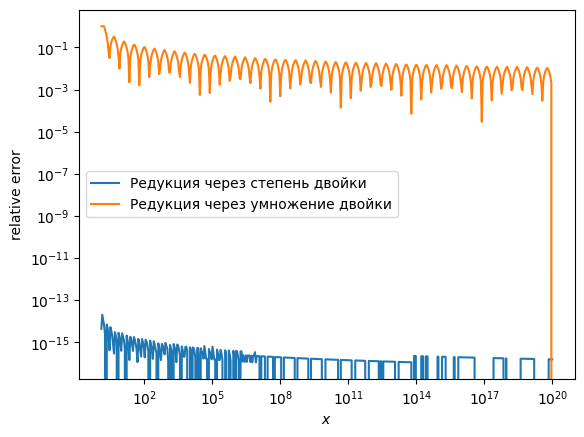

In [25]:
def red_pov(n,x):
  return np.log(np.divide(x, 2**n)) + n*np.log(2)

def red_mult(n,x):
  return (2*n)*np.log(x**(1/(2*n)))

def relative_error(x0,x):
  return np.abs(x0-x)/np.abs(x0)

def theor(n,x, eps0):
  return np.abs(np.log(x/(2**n))+n*np.log(2))*eps0


eps0=np.finfo(np.double).eps
eps=10e-15

# n for span [1 , 1 + delta]
n_pov = math.ceil(np.log(max(x)/(1+eps))/np.log(2)) 
n_mult = math.ceil((np.log(max(x))/np.log(1+eps))/2) 
N = 500
x = np.logspace(0.1, 20, N)



plt.loglog(x,relative_error(np.log(x),red_pov(n_pov,x)), label='Редукция через степень двойки')
plt.loglog(x,relative_error(np.log(x),red_mult(n_mult,x)), label='Редукция через умножение двойки')
plt.xlabel('$x$')
plt.ylabel('relative error')
plt.legend()
plt.show()

Как видим, для большей точности следует использовать редукцию через степень двойки

# Разложение в степенной ряд
## Задание
  Найдите количество слагаемых в частичной сумме, достаточное для получения значения логарифма с заданной точностью. Реализуйте вычисления логарифма через сумму с заданной точностью. Какую максимальную точность удается достичь?

 ## Решение
1) $\ln(1 + x) = x - x^2/2 + x^3/3 + ... + R_N$

Остаток ряда в форме Лагранжа:
\begin{equation}
  R_N = \frac{(x-a)^{N+1}}{(N + 1)!}f^{(N+1)}[a + \theta(x-a)] =  \frac{x^{N+1}}{(N + 1)!}\cdot\frac{1}{(1 + \theta \cdot x)^N}
\end{equation}

2) Тогда $min(R_N)$ при $\theta = 1$ при $x > 0$ и $\theta = 0$ при $x < 0$

Построим график зависимости остатка ряда от значения аргумента.

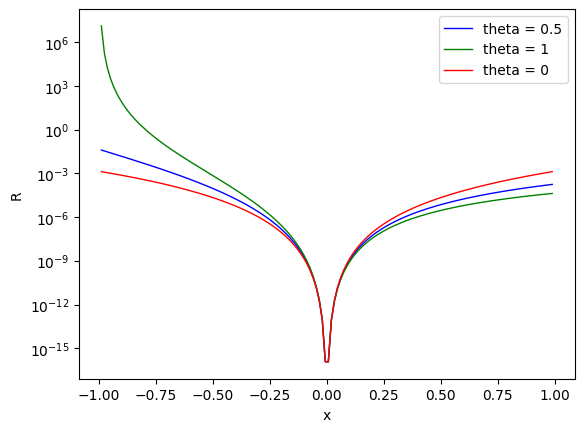

In [27]:
N = 5
theta1 = 0.5
theta2 = 1
theta3 = 0

x = np.linspace(-0.99,0.99,150)
y1 = x**(N+1)/math.factorial(N+1)/(1 + theta1*x)**N
y2 = x**(N+1)/math.factorial(N+1)/(1 + theta2*x)**N
y3 = x**(N+1)/math.factorial(N+1)/(1 + theta3*x)**N

plt.semilogy(x,y1, '-b', linewidth=1)
plt.semilogy(x,y2, '-g', linewidth=1)
plt.semilogy(x,y3, '-r', linewidth=1)
plt.ylabel("R")
plt.xlabel("x")
plt.legend(["theta = 0.5", "theta = 1", "theta = 0"])

plt.show()

Найдем количество слагаеммых в сумме, достаточное для получения логарифма при $\theta = 1$ и $x = 0.5$

In [ ]:
x = 0.5
k = 10e-9
N1 = np.linspace(0, 99, 100)
R = []

for i in range(0, len(N1)):
  b = x**(N1[i]+1)/((math.factorial(int(N1[i])))*(1+x)**(int(N1[i])))
  R.append(b)

for i in range(0, len(R)):
  if R[i] > k and k > np.finfo(np.double).eps:
    continue
  elif k > np.finfo(np.double).eps:
    print("Количество слагаемых, достаточное для получения значения логарифма с заданной точностью:",i)
    print("Максимальная погрешность остатка ряда равна", R[i])
    break
  else:
    print("Получить точность выше машинной невозможно")
    break


Количество слагаемых, достаточное для получения значения логарифма с заданной точностью: 8
Максимальная погрешность остатка ряда равна 1.890076764333737e-09


# Аппроксимация многочленами
## Задание
  Как следует из графика ошибки, предложенный выбор узлов $x_n$ плох. 
Подумайте, как лучше расположить узлы интерполяции? 
Воспользуйтесь формулой приведения 
$$x=\frac{1+2u/3}{1-2u/3},$$
позволяющей преобразовать интервал $x\in[1/5,5]$ в интервал $u\in[-1,1]$.
Будет ли разложение по степеням $u$ предпочтительнее разложения по степеням $a=x-1$?
Составьте интерполяционный многочлен Лагранжа от переменной $u$ с узлами в нулях многочлена Чебышева:
$$u_n=\cos\frac{\pi(n+1/2)}{N+1},\quad n=0..N.$$
Сравните точности аппроксимации с узлами в $x_n$ и в $u_n$.

 ## Решение
